In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


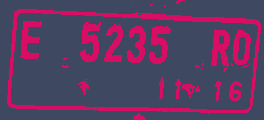

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

# Load citra plat nomor
image = cv2.imread('/content/drive/MyDrive/dummy/31-E-5235-RO-11-16_jpg.rf.aea815002fc74e2e9429d4c113a2279b.jpg')

# Konversi citra ke format HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Lakukan segmentasi menggunakan K-Means
# Misalnya, menggunakan 2 cluster untuk segmentasi plat nomor
k = 2
hsv_image = hsv_image.reshape((-1, 3))
kmeans = KMeans(n_clusters=k)
kmeans.fit(hsv_image)
cluster_centers = kmeans.cluster_centers_.astype(int)
segmented_image = cluster_centers[kmeans.labels_].reshape(image.shape)

# Tampilkan citra sebelum dan sesudah segmentasi
cv2_imshow(segmented_image)

In [ ]:
#plotting gambar
import matplotlib.pyplot as plt

def plot_images(images, titles):
    num_images = len(images)
    num_columns = 3  # 3 gambar per baris
    num_rows = (num_images + num_columns - 1) // num_columns  # Hitung jumlah baris yang diperlukan

    plt.figure(figsize=(15, 5))  # Atur ukuran gambar secara keseluruhan

    for i in range(num_images):
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])

    plt.show()

In [ ]:
import os
import random

def randomImagePicker(nImage):
    folder_path = '/content/drive/MyDrive/dummy'
    image_files = os.listdir(folder_path)

    num_images_to_select = 5
    selected_images = random.sample(image_files, num_images_to_select)

    selected_images_with_path = [os.path.join(folder_path, image) for image in selected_images]
    return selected_images_with_path

In [ ]:
def histogramEq(image):
  histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

  # Normalisasi histogram
  cdf = histogram.cumsum()
  cdf_normalized = cdf * 255 / cdf[-1]

  mapping = cdf_normalized.astype('uint8')

  equalized_image = mapping[image]

  return equalized_image


In [ ]:
# konvolusi pada gambar
def convolution2d(image,kernel,stride,padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    padded_image = np.zeros((image_height + kernel_height - 1, image_width + kernel_width - 1))
    padded_image[kernel_height // padding:image_height + kernel_height // padding, kernel_width // padding:image_width + kernel_width // padding] = image

    convolved_image = np.zeros((image_height, image_width))
    for i in range(image_height):
      for j in range(image_width):
        convolved_image[i, j] = np.sum(padded_image[i*stride:i*stride + kernel_height, j*stride:j*stride + kernel_width] * kernel)

    return convolved_image

In [ ]:
#clustering warna gambar
def clusteringWarna (k,image):
    k = 2
    newImage = image.reshape((-1, 1))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(newImage)
    cluster_centers = kmeans.cluster_centers_.astype(np.uint8)
    segmented_image = cluster_centers[kmeans.labels_].reshape(image.shape)

    # Tampilkan citra sebelum dan sesudah segmentasi

    return segmented_image

In [ ]:
folderImage= randomImagePicker(5)
print(folderImage)

['/content/drive/MyDrive/dummy/34-E-2987-QC-10-18_jpeg.rf.206a77280b1253bcb19a884ee90c977e.jpg', '/content/drive/MyDrive/dummy/47-E-4240-RY-06-19_jpeg.rf.7e7c8f0cfed449dbb89a571b77532736.jpg', '/content/drive/MyDrive/dummy/B3675BN_png.rf.9600a7928b9a7189a89e2cd84ce0e43c.jpg', '/content/drive/MyDrive/dummy/BG9988D_png.rf.3743df2b6bec43fa4d4fcc69788f62eb.jpg', '/content/drive/MyDrive/dummy/BG1980A_png.rf.0144d9ab803a1ef7c66fad4c8178699f.jpg']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

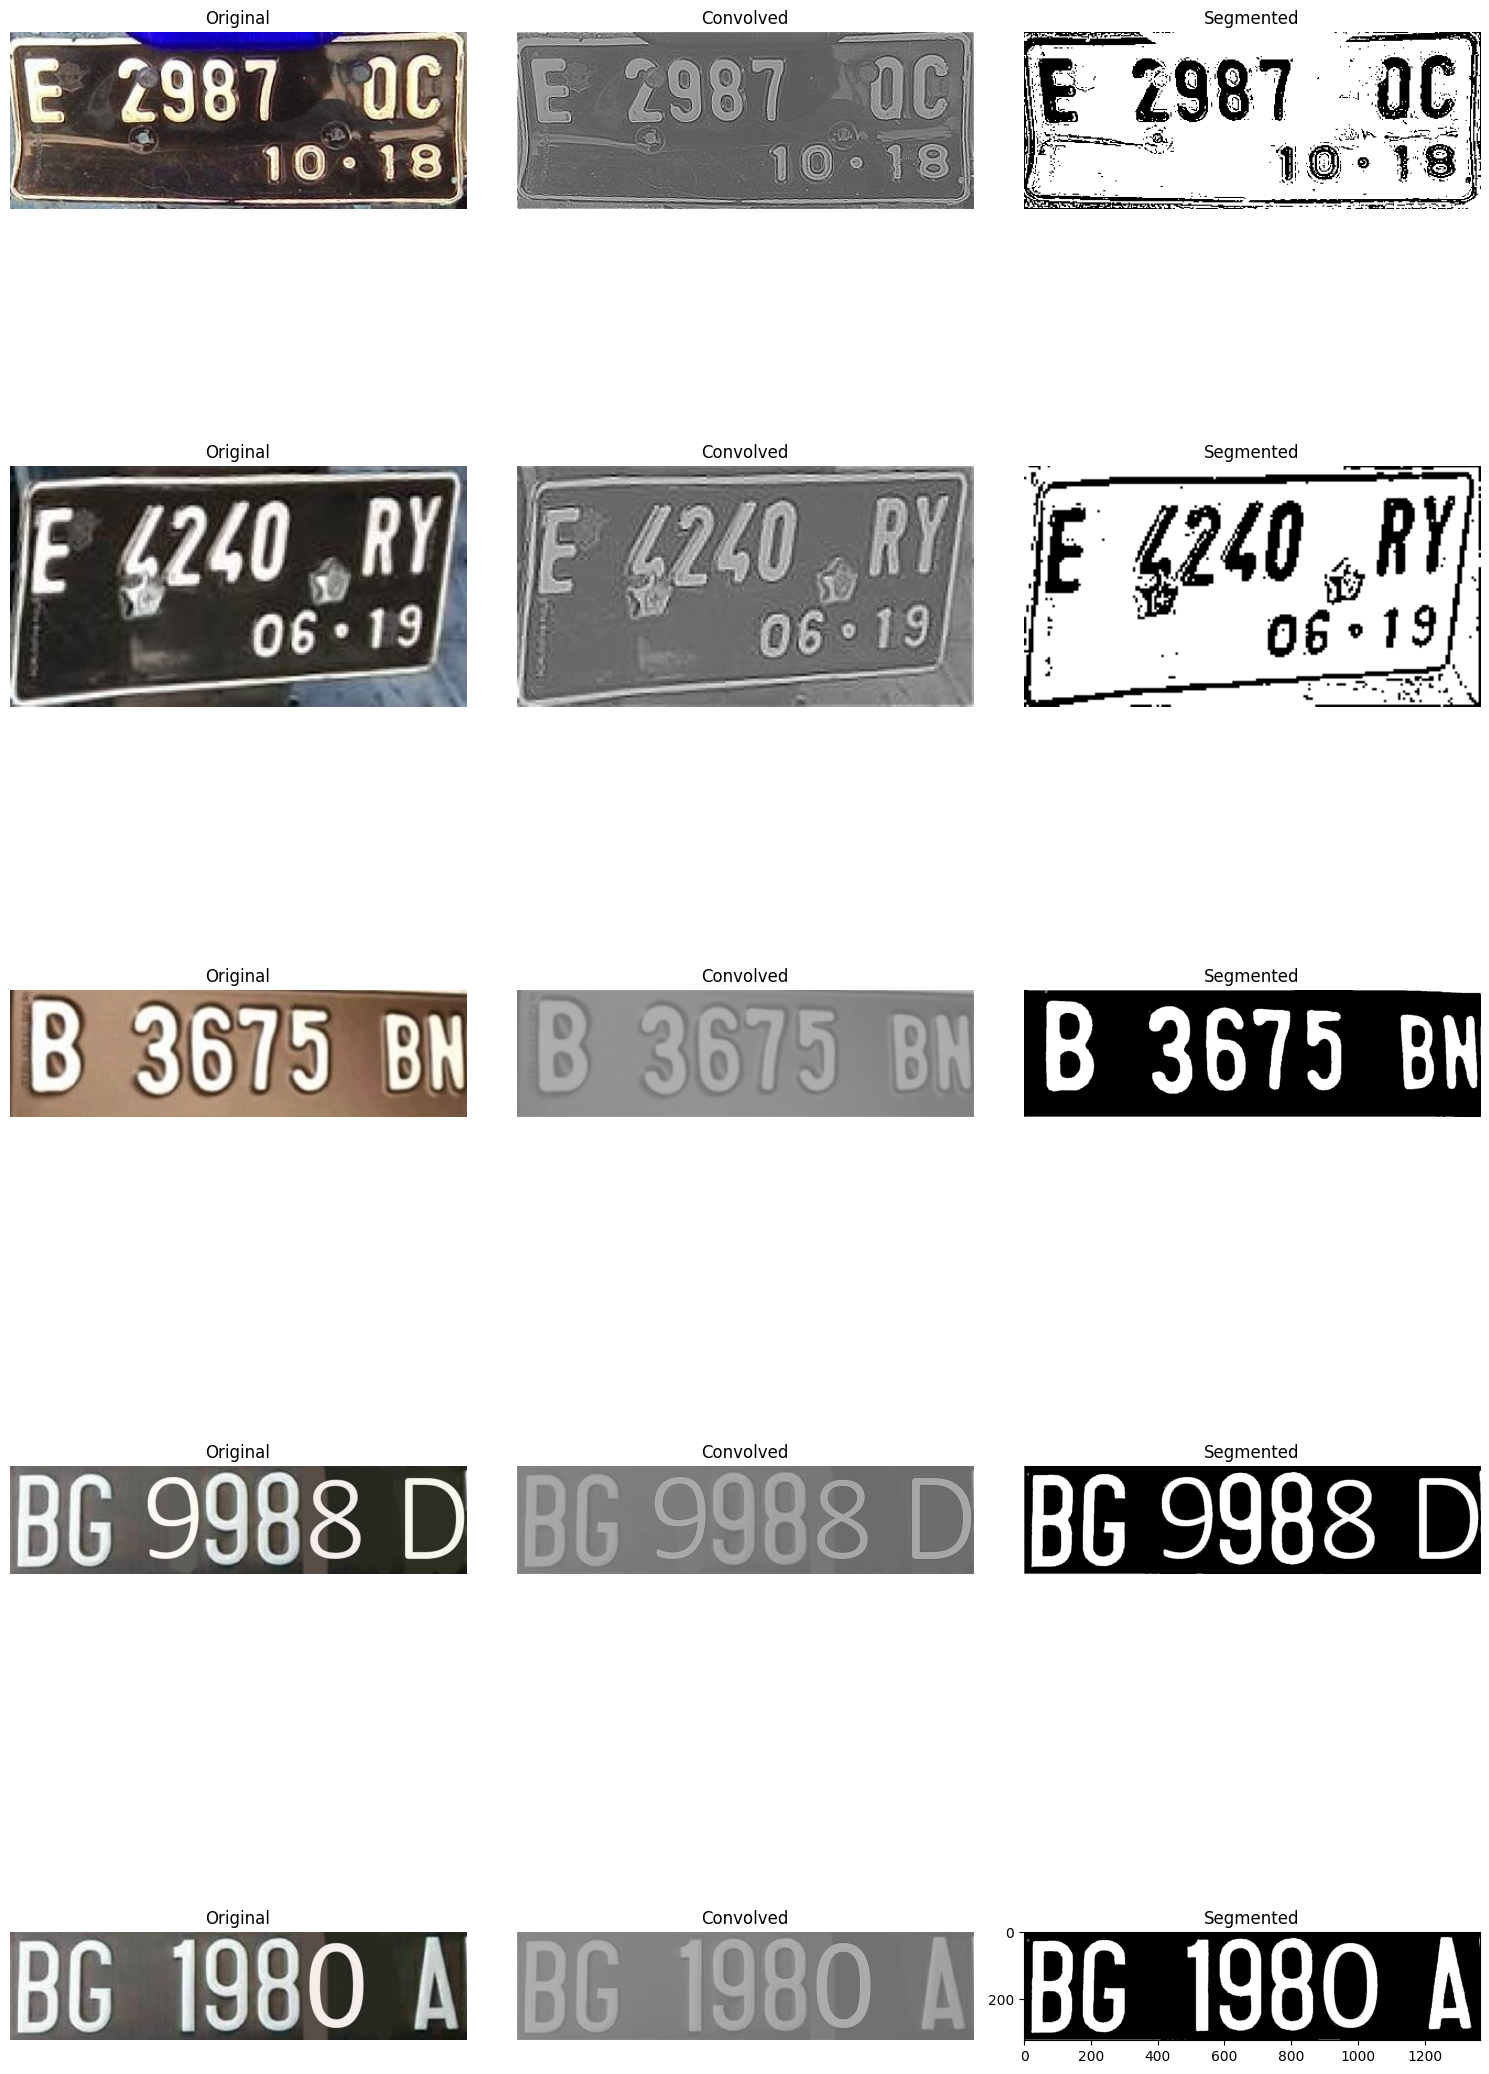

In [ ]:
num_rows = len(folderImage)
num_cols = 3

# Buat subplot dengan jumlah baris dan kolom yang sesuai
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, each in enumerate(folderImage):
    read = cv2.imread(each)
    img_gray = cv2.cvtColor(read, cv2.COLOR_BGR2GRAY)

    kernel = np.array([[0, -1, 0],
                      [-1, 5, -1],
                      [0, -1, 0]])

    convolved_image = convolution2d(img_gray, kernel, 1, 2)
    segmented_image = clusteringWarna(2, convolved_image)

    row = i
    col = 0

    axs[row, col].imshow(read, cmap='gray')
    axs[row, col].set_title('Original')

    col += 1

    axs[row, col].imshow(convolved_image, cmap='gray')
    axs[row, col].set_title('Convolved')

    col += 1

    axs[row, col].imshow(segmented_image, cmap='gray')
    axs[row, col].set_title('Segmented')

# Menghilangkan label dari subplot yang tidak digunakan
for i in range(num_rows):
    for j in range(3):
        if i != num_rows - 1 or j != 2:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()  # Tampilkan semua subplot